<a href="https://colab.research.google.com/github/Magguire/Magguire/blob/main/module_2_core_week_II_ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOUSE PRICING PREDICTION

<b>Overview</b> 

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow  the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## 1. Defining the Question

While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

1. Multiple Linear Regression
2. Quantile Regression
3. Ridge Regression
4. Lasso Regression
5. Elastic Net Regression

### a) Specifying the Question

We need to perform regression analysis on a dataset in order to find factors that affect house prices and later predict houe prices.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

1. Import necessary libraries
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording your observations.
6. Performing regression analysis:

  i.) Perform feature engineering: Incorporate categorical independent variables into your models.

  ii.) Check for multicollinearity

  iii.) Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
  
7. Provide a recommendation based on your analysis.    
8. Challenge your solution by providing insights on how you can make improvements in model improvement.
9. Conclusion  

### e) Data Relevance

## 2. Reading the Data

In [76]:
# Loading the Dataset
# url = http://bit.ly/IndependentProjectWeek7Dataset

import pandas as pd
import numpy as np

df = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

## 3. Checking the Data

In [77]:
# Determining the no. of records in our dataset
# 
df.shape

(21613, 20)

The dataset contains 21613 records of houses and 20 columns.

In [78]:
# Previewing the top of our dataset
#
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [79]:
# Previewing the bottom of our dataset
# 
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


The attributes of the houses in the dataset include the following:

Id - unique identifier of the house

price  - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot  - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area off basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode of the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15 

In [80]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [81]:
# number of floors and number of bathrooms need to integers, not floats
def float_int(column):
  df[column] = df[column].astype(int)
  return df.dtypes

float_int('bathrooms')  
float_int('floors') 

id                 int64
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

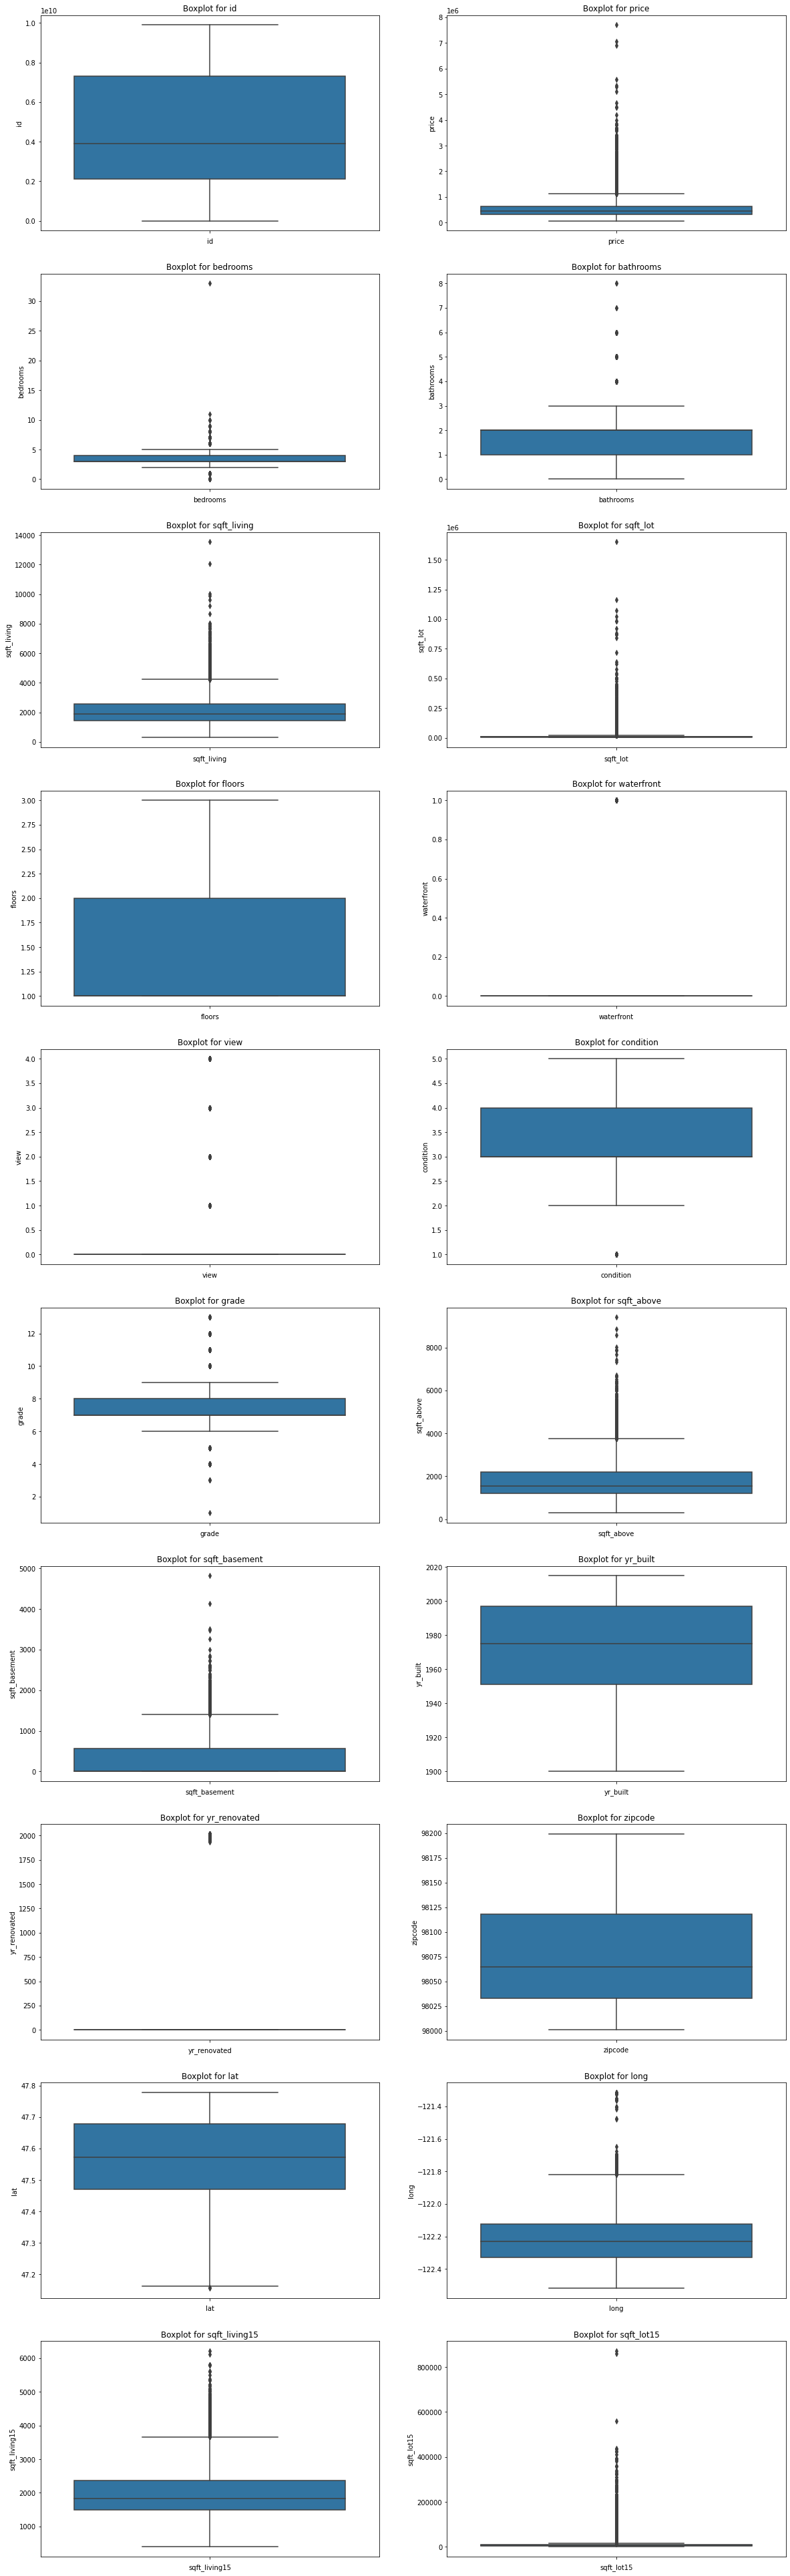

In [132]:
# Checking for Outliers
#
import matplotlib.pyplot as plt
import seaborn as sns

columns = [column for column in df.columns]
fig, ax = plt.subplots(ncols = 2, nrows = 10, figsize=(20,70))
ax = ax.ravel()

for column, ax in zip(columns, ax):
    sns.boxplot(y = df[column], ax=ax)
    ax.set_title('Boxplot for {}'.format(column))
    ax.set_xlabel(column)

plt.show()

From the outliers visuals, we can see that almost all columns have outliers. Let's investigate for actual outliers in context with the data and drop these.

In [83]:
# Checking for Anomalies
#
# check interquatile range
def interquatile_range(column):
  q1 = df[column].quantile(.25)
  q3 = df[column].quantile(.75)
  intqr = q3 - q1
  return print({column: [q1,q3,intqr]})

for column in columns:
  interquatile_range(column)

{'id': [2123049194.0, 7308900445.0, 5185851251.0]}
{'price': [321950.0, 645000.0, 323050.0]}
{'bedrooms': [3.0, 4.0, 1.0]}
{'bathrooms': [1.0, 2.0, 1.0]}
{'sqft_living': [1427.0, 2550.0, 1123.0]}
{'sqft_lot': [5040.0, 10688.0, 5648.0]}
{'floors': [1.0, 2.0, 1.0]}
{'waterfront': [0.0, 0.0, 0.0]}
{'view': [0.0, 0.0, 0.0]}
{'condition': [3.0, 4.0, 1.0]}
{'grade': [7.0, 8.0, 1.0]}
{'sqft_above': [1190.0, 2210.0, 1020.0]}
{'sqft_basement': [0.0, 560.0, 560.0]}
{'yr_built': [1951.0, 1997.0, 46.0]}
{'yr_renovated': [0.0, 0.0, 0.0]}
{'zipcode': [98033.0, 98118.0, 85.0]}
{'lat': [47.471, 47.678, 0.20700000000000074]}
{'long': [-122.328, -122.125, 0.20300000000000296]}
{'sqft_living15': [1490.0, 2360.0, 870.0]}
{'sqft_lot15': [5100.0, 10083.0, 4983.0]}


In [84]:
# Identifying the Missing Data
#
df.isnull().sum()

# There are no missing values in our dataset.

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values in our dataset. 

Other anomalies that need explanation include:

* 0 in yr_renovated - implies house was not renovated

* 0 bathrooms or bedrooms could imply that the house is a single room and could probably be best fit for single room accommodation or commercial use.

In [85]:
# More data cleaning procedures
#
# check for duplicates
df.duplicated().sum()


3

In [86]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [87]:
# reset indexing in our dataset after dropping rows
df.reset_index()
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [88]:
# check uniformity in columns
df.columns

# columns are uniform

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 6. Exploratory Analysis

In [58]:
# Ploting the univariate summaries and recording our observations
#
df.describe(include='all', datetime_is_numeric=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [89]:
# barplot function for value counts
def barplot(column):
  df[column].value_counts().plot.bar(figsize=(10,4))
  plt.title('Barplot for {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Count')
  return plt.show()

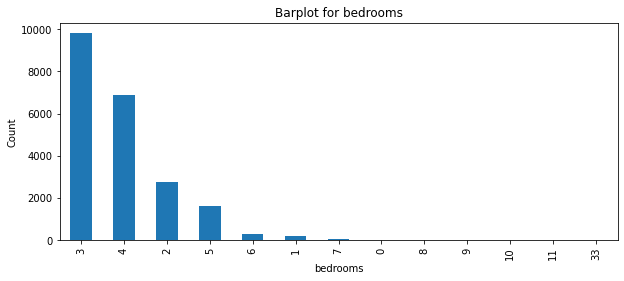

In [91]:
# tournament representation
barplot('bedrooms')

Most houses have 3 bedrooms. The maximum number of bedrooms a house has in our dataset is 33. This looks queer though maybe posible basing on the price.

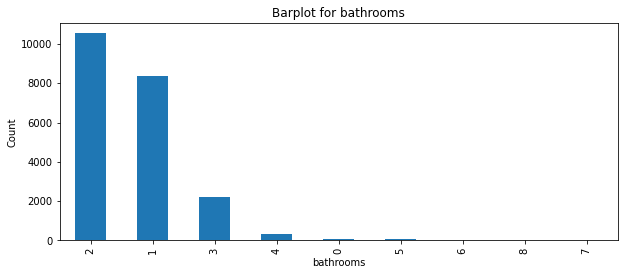

In [97]:
# year representation
barplot('bathrooms')

Most houses have 2 bathrooms. Most number of bathrooms a house can have in our dataset is 8 and the least is 0.

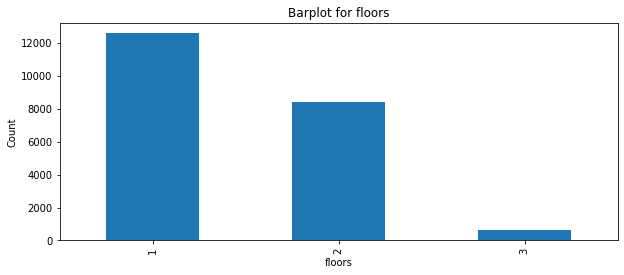

In [98]:
# country representation
barplot('floors')

Most houses have only one floor. A number of houses still have the most number of floors in our dataset which is 3. 

In [124]:
# pie chart
def pie_chart(column, explode):
  col = df.groupby(column, as_index=False)['id'].count()
  labels = col[column]
  values = col['id']
  plt.figure(figsize = (12,6))
  plt.pie(values, labels=labels, autopct = '%1.1f%%', explode = explode, shadow=True, startangle=20)
  plt.axis('equal')
  plt.title('Pie chart for {}'.format(column))
  return plt.show()

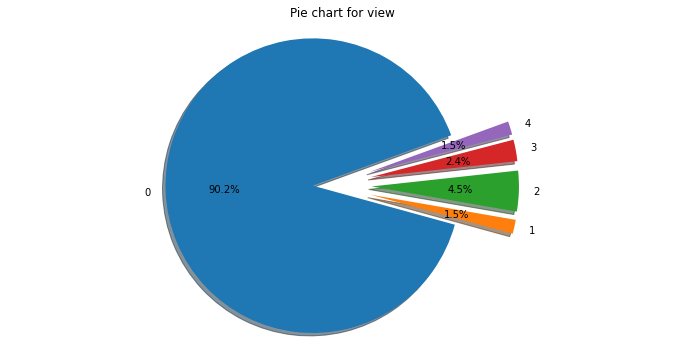

In [127]:
pie_chart('view', (0.1,0.3,0.3,0.3,0.3))

 90.2% of the houses have no views.

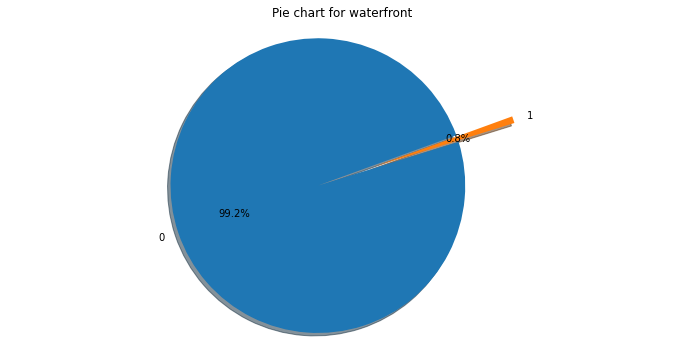

In [129]:
pie_chart('waterfront', (0.1,0.3))

Only 0.8% of the houses have a waterfront.

In [90]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


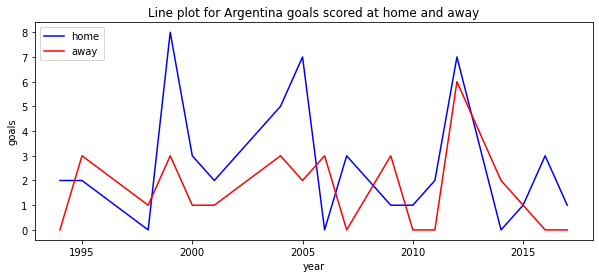

In [ ]:
# Bivariate analysis
argentina = df[(df['home_team'] == 'Argentina') | (df['away_team'] == 'Argentina')]
arg = df.groupby('year', as_index=False)['home_score', 'away_score'].sum()
year = arg['year']
home = arg['home_score']
away = arg['away_score']

plt.figure(figsize=(10,4))
plt.plot(year, home, color='blue', label='home')
plt.plot(year, away, color='red', label='away')
plt.legend(loc='upper left')
plt.title('Line plot for Argentina goals scored at home and away')
plt.xlabel('year')
plt.ylabel('goals')
plt.show()

Argentina scored more goals at home than away. Highest number of goals scored at home are 8 while highest number of goals scored away are 6.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


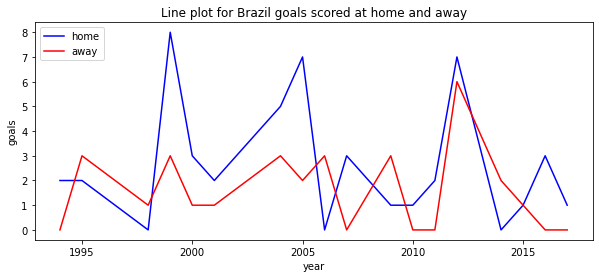

In [ ]:
brazil = df[(df['home_team'] == 'Brazil') | (df['away_team'] == 'Brazil')]
braz = df.groupby('year', as_index=False)['home_score', 'away_score'].sum()
year = braz['year']
home = braz['home_score']
away = braz['away_score']

plt.figure(figsize=(10,4))
plt.plot(year, home, color='blue', label='home')
plt.plot(year, away, color='red', label='away')
plt.legend(loc='upper left')
plt.title('Line plot for Brazil goals scored at home and away')
plt.xlabel('year')
plt.ylabel('goals')
plt.show()

Similarly, Brazil scored more goals at home than away.The highest number of home goals is 8 and the highest number of away goals is 6.

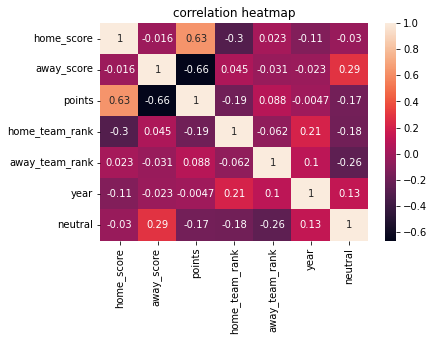

In [ ]:
# check correlation
sns.heatmap(df.corr(), annot=True)
plt.title('correlation heatmap')
plt.show()

The strong poitive correlation between home score and points makes sense as points column has been derived from the performance of the home team. We will therefore not use points column for our predictive analysis.


## 7. Implementing the Solution

## Polynomial Approach

What to train given:

Rank of home team

Rank of away team

Tournament type

#### Model 1: Predict how many goals the home team scores.



In [ ]:
df.head()

,date,home_team,away_team,home_score,away_score,points,tournament,home_team_rank,away_team_rank,year,neutral,city,country
0,1994-03-23,Brazil,Argentina,2,0,2,Friendly,2,8,1994,False,Recife,Brazil
1,1995-07-17,Brazil,Argentina,2,2,1,Copa América,1,5,1995,True,Rivera,Uruguay
2,1995-11-08,Argentina,Brazil,0,1,0,Friendly,7,1,1995,False,Buenos Aires,Argentina
3,1998-04-29,Brazil,Argentina,0,1,0,Friendly,1,7,1998,False,Rio de Janeiro,Brazil
4,1999-07-11,Brazil,Argentina,2,1,2,Copa América,1,6,1999,True,Ciudad del Este,Paraguay


In [ ]:
# select necessary columns
df2 = df[['year', 'home_team', 'away_team', 'home_team_rank', 'away_team_rank', 'tournament', 'home_score', 'away_score', 'points', 'neutral']]
df2.head()

,year,home_team,away_team,home_team_rank,away_team_rank,tournament,home_score,away_score,points,neutral
0,1994,Brazil,Argentina,2,8,Friendly,2,0,2,False
1,1995,Brazil,Argentina,1,5,Copa América,2,2,1,True
2,1995,Argentina,Brazil,7,1,Friendly,0,1,0,False
3,1998,Brazil,Argentina,1,7,Friendly,0,1,0,False
4,1999,Brazil,Argentina,1,6,Copa América,2,1,2,True


In [ ]:
# turn tournament categorical column into a numeric column
df2 = pd.get_dummies(df2)
df2.head()

,year,home_team_rank,away_team_rank,home_score,away_score,points,neutral,home_team_Argentina,home_team_Brazil,away_team_Argentina,away_team_Brazil,tournament_Confederations Cup,tournament_Copa América,tournament_FIFA World Cup qualification,tournament_Friendly
0,1994,2,8,2,0,2,False,0,1,1,0,0,0,0,1
1,1995,1,5,2,2,1,True,0,1,1,0,0,1,0,0
2,1995,7,1,0,1,0,False,1,0,0,1,0,0,0,1
3,1998,1,7,0,1,0,False,0,1,1,0,0,0,0,1
4,1999,1,6,2,1,2,True,0,1,1,0,0,1,0,0


In [ ]:
# drop irrelevant columns. We shall use home_team_Brazil only to keep track of the home and away team
df2.drop(['home_team_Argentina', 'away_team_Argentina', 'away_team_Brazil'], axis=1, inplace=True)

In [ ]:
# change neutral values manually
# 0 = False and 1 = True
df2['neutral'] = df2['neutral'].replace(True, 1).replace(False,0)
df2.head()                        

,year,home_team_rank,away_team_rank,home_score,away_score,points,neutral,home_team_Brazil,tournament_Confederations Cup,tournament_Copa América,tournament_FIFA World Cup qualification,tournament_Friendly
0,1994,2,8,2,0,2,0,1,0,0,0,1
1,1995,1,5,2,2,1,1,1,0,1,0,0
2,1995,7,1,0,1,0,0,0,0,0,0,1
3,1998,1,7,0,1,0,0,1,0,0,0,1
4,1999,1,6,2,1,2,1,1,0,1,0,0


In [ ]:
df2.shape

(26, 12)

In [ ]:
# split data into X and y

X = df2.drop(['home_score', 'away_score', 'points', 'year'], axis=1).values
y = df2['home_score'].values

In [ ]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state = 0)



In [ ]:
# create Linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# fit for X_train and y_train
lin_reg.fit(X_train, y_train)

# evaluate results
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)

# get rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


1.1111777325968102

In [ ]:
# finding residuals
residuals = np.subtract(y_test,y_pred)

# check residuals
pd.DataFrame(residuals).describe()

,0
count,8.000000
mean,-0.237883
std,1.160358
min,-1.303503
25%,-1.181525
50%,-0.759131
75%,0.870907
max,1.502210


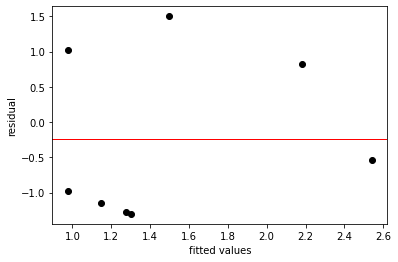

In [ ]:
# plot residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

We can see that there are several outliers despite the mean being close to zero. Therefore the data is not normally distributed.

In [ ]:
# fitting polynimial regression
# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state = 0)


# create polynomial regression object
from sklearn.preprocessing import PolynomialFeatures

# look for a degree that minimizes the rmse
poly_reg = PolynomialFeatures(degree = 1)

# transform X_train 
X_poly = poly_reg.fit_transform(X_train)
X_test = poly_reg.transform(X_test)

# fit polynimial regression fitted model into linear regression
lin_reg = LinearRegression()

lin_reg.fit(X_poly, y_train)

# evaluate results
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)

# get rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.1111777325968113

In [ ]:
 # finding residuals
residuals = np.subtract(y_test,y_pred)

# check residuals
pd.DataFrame(residuals).describe()


,0
count,8.000000
mean,-0.237883
std,1.160358
min,-1.303503
25%,-1.181525
50%,-0.759131
75%,0.870907
max,1.502210


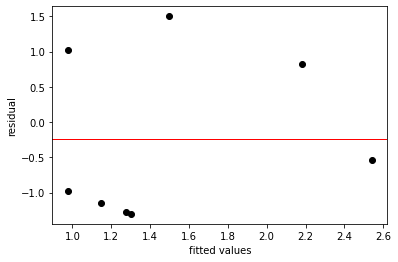

In [ ]:
# plot residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Since the number of polynomial degrees that minimizes the rmse is 1, this is similar to the linear regression model residual plot above.

In [ ]:
# performing k_fold cross validation
from sklearn.model_selection import KFold
from sklearn import metrics

# perform k-fold using 10 folds
folds = KFold(n_splits=10)

# number of folds/splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# create and assess the 10 models based on the folds we created.

RMSES = [] 
count = 1

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly

  lin_reg = LinearRegression()

  # fit for X_train and y_train
  lin_reg.fit(X_train, y_train)

  # look for a degree that minimizes the rmse
  poly_reg = PolynomialFeatures(degree = 1)

  # transform X_train 
  X_poly = poly_reg.fit_transform(X_train)

  # fit polynimial regression fitted model into linear regression
  lin_reg = LinearRegression()

  lin_reg.fit(X_poly, y_train)
  
  # assess the accuraccy of the model
  y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' --- Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 --- Root Mean Squared Error: 0.8581222223371546

Training model 2
Model 2 --- Root Mean Squared Error: 1.7407095733714957

Training model 3
Model 3 --- Root Mean Squared Error: 1.40154913742293

Training model 4
Model 4 --- Root Mean Squared Error: 1.206690307269919

Training model 5
Model 5 --- Root Mean Squared Error: 1.088680947356296

Training model 6
Model 6 --- Root Mean Squared Error: 0.9897278960670339

Training model 7
Model 7 --- Root Mean Squared Error: 1.3657549952899948

Training model 8
Model 8 --- Root Mean Squared Error: 1.7671111511311002

Training model 9
Model 9 --- Root Mean Squared Error: 1.2445865193664771

Training model 10
Model 10 --- Root Mean Squared Error: 0.20502342687616495


The least rmse score for polynomial regression method is for model 10 ~ 0.21.

The residuals are not centered around the mean which is close to 0. There is a pattern in the data which implies that there is unequal variance between at least two data points. The data is also not normally distributed due to the presence of outliers.

In [ ]:
# heteroskedasticity test
from scipy import stats

test_result, p_value = stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


0.17073007955064798
the variances are unequal, and the model should be reassessed


#### Model 2: Predict how many goals the away team scores.

In [ ]:
# split data into X and y

X = df2.drop(['home_score', 'away_score', 'points', 'year'], axis=1).values
y = df2['away_score'].values

In [ ]:
# Split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state = 0)


In [ ]:
# create Linear regression model
lin_reg = LinearRegression()

# fit for X_train and y_train
lin_reg.fit(X_train, y_train)

# evaluate results

y_pred = lin_reg.predict(X_test)

# get rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.2110444655943815

Root mean square value is fairly small which means that the accuracy of our model is high.

In [ ]:
# finding residuals
residuals = np.subtract(y_test,y_pred)

# check residuals
pd.DataFrame(residuals).describe()

,0
count,8.000000
mean,0.057729
std,1.293189
min,-1.331569
25%,-1.158813
50%,0.077967
75%,0.813463
max,2.299783


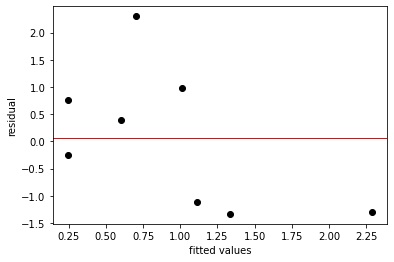

In [ ]:
# plot residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

There are several outliers despite the mean being very close to zero. Therefore the data is not normally distributed.

In [ ]:
# fitting polynimial regression

# create polynomial regression object
from sklearn.preprocessing import PolynomialFeatures

# look for a degree that minimizes the rmse
poly_reg = PolynomialFeatures(degree = 1)

# transform X_train 
X_poly = poly_reg.fit_transform(X_train)
X_test = poly_reg.transform(X_test)

In [ ]:
# fit polynimial regression fitted model into linear regression
lin_reg = LinearRegression()

lin_reg.fit(X_poly, y_train)

# evaluate results
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)

# get rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.5658608737695344

The root mean square error value is even smaller implying that this prediction model has more accurate results. 

In [ ]:
# performing k_fold cross validation
from sklearn.model_selection import KFold
from sklearn import metrics

# perform k-fold using 10 folds
folds = KFold(n_splits=10)

# number of folds/splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# create and assess the 10 models based on the folds we created.

RMSES = [] 
count = 1

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly

  lin_reg = LinearRegression()

  # fit for X_train and y_train
  lin_reg.fit(X_train, y_train)

  # look for a degree that minimizes the rmse
  poly_reg = PolynomialFeatures(degree = 1)

  # transform X_train 
  X_poly = poly_reg.fit_transform(X_train)

  # fit polynimial regression fitted model into linear regression
  lin_reg = LinearRegression()

  lin_reg.fit(X_poly, y_train)
  
  # assess the accuraccy of the model
  y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' --- Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 --- Root Mean Squared Error: 0.8383404466367272

Training model 2
Model 2 --- Root Mean Squared Error: 0.47103803070464667

Training model 3
Model 3 --- Root Mean Squared Error: 1.1621555475088785

Training model 4
Model 4 --- Root Mean Squared Error: 0.6015625184246106

Training model 5
Model 5 --- Root Mean Squared Error: 1.4022043329525928

Training model 6
Model 6 --- Root Mean Squared Error: 1.8706916741959454

Training model 7
Model 7 --- Root Mean Squared Error: 1.9878283524043634

Training model 8
Model 8 --- Root Mean Squared Error: 0.6631262533028627

Training model 9
Model 9 --- Root Mean Squared Error: 0.3739513573754706

Training model 10
Model 10 --- Root Mean Squared Error: 1.7923360557749528


Model 9 has the least rmse ~ 0.374

In [ ]:
 # finding residuals
residuals = np.subtract(y_test,y_pred)

# check residuals
pd.DataFrame(residuals).describe()

,0
count,2.000000
mean,-1.771178
std,0.388320
min,-2.045762
25%,-1.908470
50%,-1.771178
75%,-1.633887
max,-1.496595


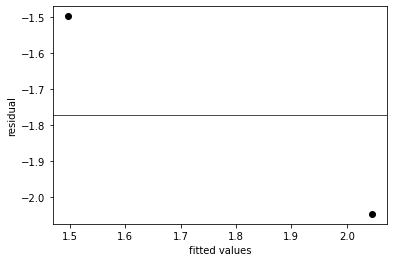

In [ ]:
# plot residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# heteroskedasticity test
from scipy import stats

test_result, p_value = stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

0.0
the variances are homogeneous!


## Approach 2: Logistic approach

In [ ]:
# lets preview our dataset once more
# From the points column, win=3, draw=1 and loss=0
# we are going to predict the points given home team rank and away team rank, home score and away score and tournament type
df2.head()

,year,home_team_rank,away_team_rank,home_score,away_score,points,neutral,home_team_Brazil,tournament_Confederations Cup,tournament_Copa América,tournament_FIFA World Cup qualification,tournament_Friendly
0,1994,2,8,2,0,2,0,1,0,0,0,1
1,1995,1,5,2,2,1,1,1,0,1,0,0
2,1995,7,1,0,1,0,0,0,0,0,0,1
3,1998,1,7,0,1,0,0,1,0,0,0,1
4,1999,1,6,2,1,2,1,1,0,1,0,0


In [ ]:
# we are going to predict the points given home team rank and away team rank, home score and away score
# split data into X and y
X = df2.drop('points', axis=1).values
y = df2['points'].values

In [ ]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [ ]:
# create logistic regression method

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

# fit model into X_train and y_train
log_reg.fit(X_train, y_train)

# make prediction for y
y_pred = log_reg.predict(X_test)

In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# The results from the confusion matrix tell us that 3,1 and 4 are the number of correct predictions. 
# The accuracy in this case is therefore 100%

array([[3, 0, 0],
       [0, 1, 0],
       [0, 0, 4]])

The logistic regression model is overfitting the data.

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






Our final dataset contains very few games played between Argentina and Brazil. This implies that the datasets contains missing matches and missing rankings which can be used for more accurate predictions. We would need to collect more data in order to decrease error in our models.

Another model also needs to be chosen for prediction since there the data points have unequal variances.

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

The data was accurate despite having very few datapoints for a pair of teams.

### b). Do we need other data to answer our question?

We need other data to answer the question.

### c). Did we have the right question?

Our research question was relevant since the dataset possess the capability to correctly our predict the variables.